# "Mapping India's Startup Boom: Analyzing Funding Trends, Cities & Investors"

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import datetime

In [2]:
df=pd.read_csv('Indian_startup_funding_2023.csv')
df.head()

,S.No,Date dd/mm/yyyy,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,Investment Type,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,"General Atlantic, Prosus, Peak XV, Sofina, Cha...",Private Equity Round,"40,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"1,00,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"3,83,58,860",NaN
3,4,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [3]:
df.isnull().sum()

S.No                    0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
Sub Vertical          936
City  Location        180
Investors Name         24
Investment Type         4
Amount in USD         960
Remarks              2625
dtype: int64

In [4]:
df = df.dropna(subset=['Date dd/mm/yyyy', 'Amount in USD', 'Investment Type'])

df['City  Location'].fillna('Unknown', inplace=True)
df['Investors Name'].fillna('Unknown', inplace=True)

df['Industry Vertical'].fillna("Not specified", inplace=True)

df.drop(['Sub Vertical', 'Remarks'], axis=1, inplace=True)

In [5]:
df.isnull().sum()

S.No                 0
Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    0
City  Location       0
Investors Name       0
Investment Type      0
Amount in USD        0
dtype: int64

In [6]:
df.shape

(2081, 8)

In [7]:
df['City  Location'].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Hyderabad', 'Burnsville', 'Menlo Park',
       'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore', 'Taramani',
       'Andheri', 'Chembur', 'Haryana', 'New York', 'Karnataka',
       'Mumbai/Bengaluru', 'Bhopal', 'Bengaluru and Gurugram',
       'India/Singapore', 'Jaipur', 'India/US', 'Nagpur', 'Indore',
       'New York, Bengaluru', 'California', 'India', 'Ahemadabad',
       'Rourkela', 'Bhubneswar', 'Chandigarh', 'Delhi & Cambridge',
       'Kolkata', 'Coimbatore', 'Bangalore', 'Udaipur', 'Ahmedabad',
       'Surat', 'Goa', 'Gaya', 'Vadodara', 'Missourie', 'Panaji',
       'Gwalior', 'Bangalore/ Bangkok', 'Kerala', 'Unknown', 'Lucknow',
       'Trivandrum', 'SFO / Bangalore', 'Pune/Seattle', 'Pune / Dubai',
       'Bangalore / SFO', 'Varanasi', 'New Delhi / US', 'Mumbai / UK',
       'Kanpur', 'Jodhpur', 'Hy

In [8]:
df['City  Location'] = df['City  Location'].str.split('/').str[0].str.strip() #Bangalore / SFO → Bangalore

In [9]:
df['City  Location'] = df['City  Location'].replace({'Bangalore': 'Bengaluru','Gurgaon': 'Gurugram','Delhi': 'New Delhi',
    'Bombay': 'Mumbai','Ahemadabad': 'Ahmedabad'})

In [10]:
indian_cities = ['Bengaluru', 'New Delhi', 'Mumbai', 'Gurugram', 'Pune', 'Hyderabad','Chennai', 'Noida', 'Ahmedabad', 'Kolkata', 'Jaipur', 'Indore',
                 'Vadodara','Coimbatore', 'Lucknow', 'Surat']

df = df[df['City  Location'].isin(indian_cities)]

In [11]:
df['City  Location'].unique()

array(['Bengaluru', 'Gurugram', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Hyderabad', 'Jaipur', 'Indore', 'Ahmedabad', 'Kolkata',
       'Coimbatore', 'Surat', 'Vadodara', 'Lucknow'], dtype=object)

In [12]:
df.rename(columns={'Date dd/mm/yyyy': 'Date'}, inplace=True)

In [13]:
df['Date']= pd.to_datetime(df['Date'], dayfirst=True, errors='coerce') #errors='coerce' replaces invalid or unknown dates with NaT

In [14]:
df['Date'].head()

0   2020-01-09
1   2020-01-13
2   2020-01-09
3   2020-01-02
4   2020-01-02
Name: Date, dtype: datetime64[ns]

In [15]:
df['Date'].dt.year.unique() #checking for wrong year(maybe entry mistakes)

array([2020., 2019., 2018.,   nan, 2017., 2016., 2015.])

In [16]:
df=df.sort_values(by='Date')

In [17]:
df['Year']= pd.to_datetime(df['Date'], dayfirst=True, errors='coerce').dt.year

In [18]:
df['Year']=df['Year'].astype('Int64')

In [19]:
df.head()

,S.No,Date,Startup Name,Industry Vertical,City Location,Investors Name,Investment Type,Amount in USD,Year
2810,2811,2015-04-03,Swiggy,Online Food Delivery,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,"20,00,000",2015
2811,2812,2015-04-04,Bluegape,Web Content Publishing,Gurugram,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,"2,00,000",2015
2813,2814,2015-04-06,InstaLively,Video Streaming,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,"1,20,000",2015
2815,2816,2015-04-07,Quikr,Online Classifieds,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,"15,00,00,000",2015
2814,2815,2015-04-07,Pricejugaad,Price Comparison,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,"1,65,000",2015


In [20]:
df['Amount in USD'].describe() #checking for very large amounts(maybe unrealistic)

count          1864
unique          429
top       10,00,000
freq            150
Name: Amount in USD, dtype: object

In [21]:
df['Amount in USD'].head(10)

2810       20,00,000
2811        2,00,000
2813        1,20,000
2815    15,00,00,000
2814        1,65,000
2816       22,00,000
2818     1,00,00,000
2819     2,50,00,000
2820    40,00,00,000
2822       20,00,000
Name: Amount in USD, dtype: object

In [22]:
#removing commas and converting string into float
df['Amount in USD'] = df['Amount in USD'].str.replace(',', '')
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

# 🔎Q. How has the total funding in Indian startups evolved over the years?

In [23]:
yearly_funding= df.groupby('Year')['Amount in USD'].sum().reset_index()

In [24]:
yearly_funding.head()

,Year,Amount in USD
0,2015,7.237246e+09
1,2016,3.810097e+09
2,2017,1.041903e+10
3,2018,4.673775e+09
4,2019,7.567483e+09


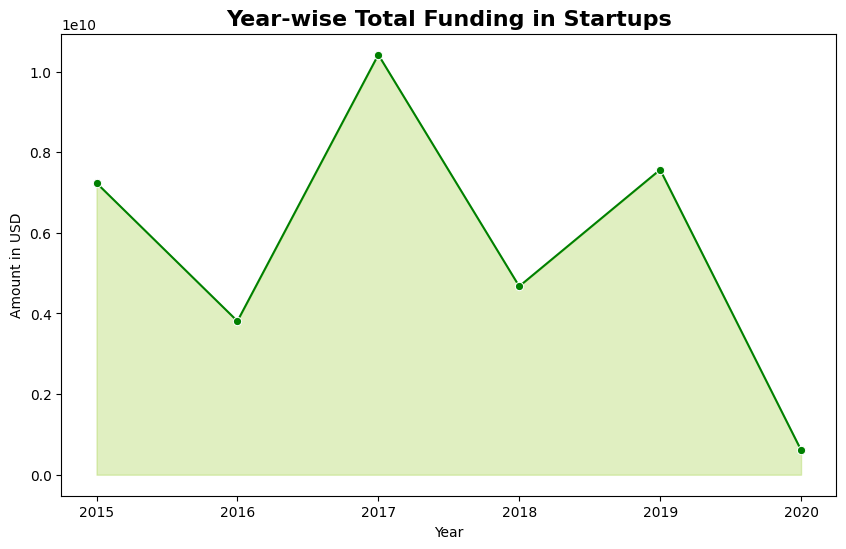

In [25]:
plt.figure(figsize=(10, 6))
years=yearly_funding['Year']
funding=yearly_funding['Amount in USD']
sns.lineplot(x=years, y=funding, color='green', marker='o')
plt.fill_between(years, funding, alpha=0.3, color='yellowgreen')
plt.title('Year-wise Total Funding in Startups', fontsize=16, fontweight='bold')
plt.savefig("areaplot.png", dpi=300, bbox_inches='tight')
plt.show()

### *💡We observe a significant rise in total funding between 2015-2019 peaking around 2017-2018. However, there seems to be a sharp decline after 2019, possibly influenced by external factors like market saturation or global events such as Covid-19 pandemic.*

###

# 🔎Which Indian cities are leading the startup wave? 

In [26]:
#grouping and counting startups by cities
top_cities=df['City  Location'].value_counts().head(10).reset_index()
top_cities.columns=['City', 'Number of Startups']

In [27]:
top_cities

,City,Number of Startups
0,Bengaluru,592
1,Mumbai,406
2,New Delhi,269
3,Gurugram,246
4,Pune,77
5,Chennai,75
6,Hyderabad,73
7,Noida,56
8,Ahmedabad,29
9,Jaipur,14


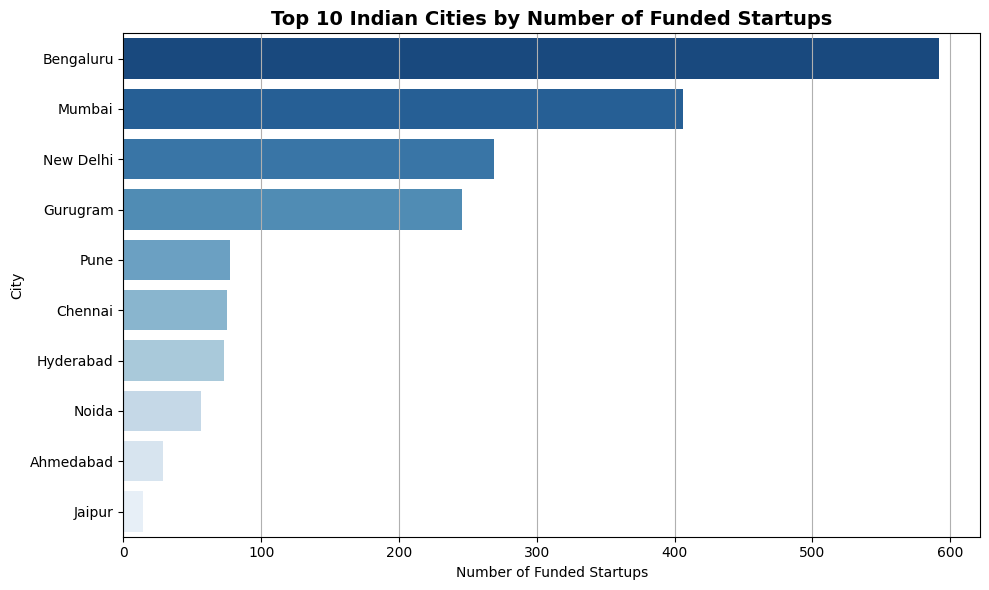

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_cities, x='Number of Startups', y='City', palette='Blues_r')

plt.title("Top 10 Indian Cities by Number of Funded Startups", fontsize=14, fontweight='bold')
plt.xlabel("Number of Funded Startups")
plt.ylabel("City")
plt.grid(axis='x')
plt.tight_layout()
plt.savefig("barplot.png", dpi=300, bbox_inches='tight')
plt.show()

### *💡This plot shows the Top 10 Cities based on the number of startups founded there.*
### *Insights: Bangalore clearly leads the chart showing why it's called the startup hub of India. Mumbai and Delhi follow closely benefitting from strong investor and business infrastructure. Cities like Hyderabad, Pune and Gurgaon are also getting popular for new startups. Meanwhile, cities like Ahmedabad and Jaipur are also entering the startup scene.*

###

# 🔎What type of investments are common in different cities?

In [29]:
df['Investment Type'].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', 'PrivateEquity',
       'Seed/Angel Funding', 'Private', 'Angel / Seed Funding',
       'Structured Debt', 'Term Loan', 'Seed / Angle Funding', 'Equity',
       'Seed / Angel Funding', 'Seed/ Angel Funding', 'Series E',
       'Pre-Series A', 'Series C', 'Private Funding', 'Series D',
       'Series A', 'Series B', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Debt-Funding', 'Pre Series A',
       'Inhouse Funding', 'Debt and Preference capital', 'Venture Round',
       'Debt', 'Bridge Round', 'Venture - Series Unknown', 'Seed Round',
       'pre-Series A', 'Angel', 'Private Equity Round',
       'Seed Funding Round', 'Single Venture', 'Corporate Round',
       'Series F', 'Seed', 'pre-series A', 'Maiden Round', 'Venture',
       'Funding Round', 'Pre-series A'], dtype=object)

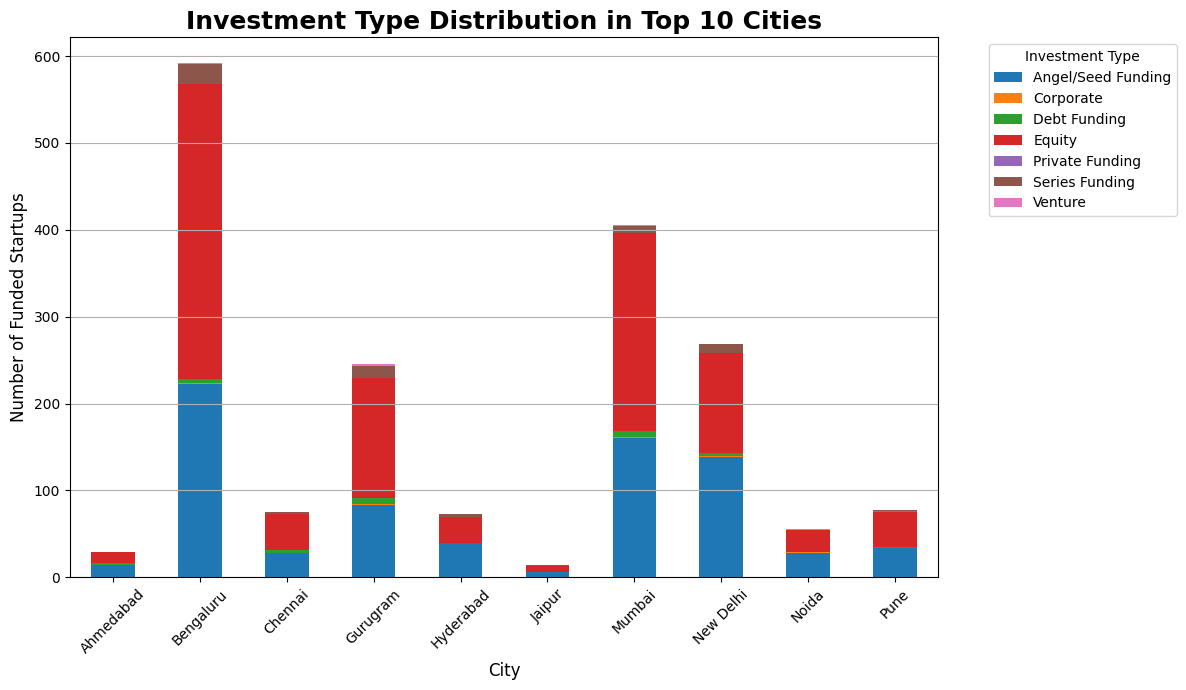

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df['Investment Type']=df['Investment Type'].replace({'Angel':'Angel/Seed Funding', 'Debt-Funding':'Debt Funding',
                                                     'Debt':'Debt Funding', 'Pre series A':'Series Funding', 'Pre Series A':'Series Funding',
                                                    'Pre-Series A':'Series Funding', 'Angel / Seed Funding':'Angel/Seed Funding',
                                                    'pre-series A':'Series Funding','pre-Series A':'Series Funding', 'Single Venture':'Venture',
                                                    'Seed/ Angel Funding':'Angel/Seed Funding', 'Seed/Angel Funding':'Angel/Seed Funding',
                                                     'Seed / Angle Funding':'Angel/Seed Funding', 'Seed Funding Round':'Angel/Seed Funding',
                                                    'Private Equity':'Equity', 'PrivateEquity':'Equity','Private':'Private Funding',
                                                    'Series B (Extension)':'Series B', 'Private Funding': 'Equity', 'Mezzanine':'Corporate',
                                                     'Venture - Series Unknown':'Venture','Seed Funding':'Angel/Seed Funding',
                                                     'Seed / Angel Funding': 'Angel/Seed Funding','Seed Round': 'Angel/Seed Funding',
                                                     'Seed': 'Angel/Seed Funding','Maiden Round': 'Angel/Seed Funding','Series A': 'Series Funding',
                                                     'Series B': 'Series Funding','Series B (Extension)': 'Series Funding',
                                                     'Series D': 'Series Funding','Series E': 'Series Funding','Series F': 'Series Funding',
                                                     'Pre-series A': 'Series Funding', 'Debt and Preference capital':'Debt Funding',
                                                    'Structured Debt':'Debt Funding', 'Term Loan':'Debt Funding', 'Funding Round': 'Venture',
                                                    'Corporate Round': 'Corporate','Inhouse Funding': 'Corporate','Bridge Round': 'Corporate',
                                                    'Venture Round':'Venture', 'Private Equity Round': 'Equity', 'Private Funding': 'Equity',
                                                    'Equity Based Funding':'Equity','Series C': 'Series Funding'})

top_city=df['City  Location'].value_counts().head(10).index
city_funding_type= df[df['City  Location'].isin(top_city)]
grouped=city_funding_type.groupby(['City  Location','Investment Type']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True, figsize=(12,7))
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Funded Startups", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Investment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Investment Type Distribution in Top 10 Cities", fontweight='bold', fontsize=18)
plt.tight_layout()
plt.grid(axis='y')
plt.savefig("stackedplot.png", dpi=300, bbox_inches='tight')
plt.show()

### *💡This stacked bar chart shows the distribution of different investment types accross the Top 10 Cities with most startups.*
### *Insights: Equity Investment is the most dominant type accross almost all cities indicating that the most startups are raising funds by giving ownership in return. Seed Funding is also quite frequent especially in Bangalore, Mumbai and Gurugram. Smaller cities like Jaipur and Ahmedabad are mostly relying on Equity and Seed/Angel investments. Cities like Bangalore and Gurugram also attract decent level of Series Funding startups.*

###

# 🔎Which startups received the most funding? 

In [31]:
df['Startup Name']=df['Startup Name'].replace({'Flipkart.com':'Flipkart', 'Ola Cabs':'Ola', 'Rapido Bike Taxi': 'Rapido'})

In [32]:
top_startup=df.groupby('Startup Name')['Amount in USD'].sum().reset_index()
top_startup=top_startup.sort_values(by='Amount in USD', ascending=False).head(10).reset_index(drop=True)

In [33]:
top_startup

,Startup Name,Amount in USD
0,Flipkart,4.759700e+09
1,Rapido,3.900751e+09
2,Paytm,3.148950e+09
3,Ola,1.653200e+09
4,Udaan,8.700000e+08
5,Snapdeal,7.000000e+08
6,True North,6.000000e+08
7,BigBasket,5.070000e+08
8,Zomato,4.350000e+08
9,BYJU’S,4.000000e+08


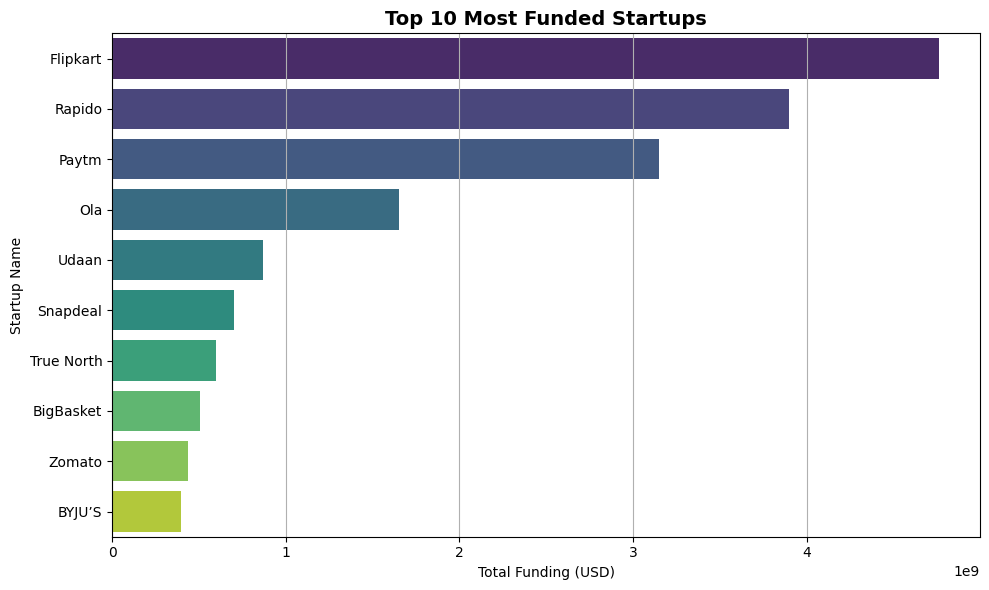

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_startup, x='Amount in USD', y='Startup Name', palette='viridis')

plt.title("Top 10 Most Funded Startups", fontsize=14, fontweight='bold')
plt.xlabel("Total Funding (USD)")
plt.ylabel("Startup Name")
plt.grid(axis='x')
plt.tight_layout()
plt.savefig("barplot2.png", dpi=300, bbox_inches='tight')
plt.show()

### *💡This plot highlights the Top 10 most funded startups in the dataset based on the total funding received (in USD).*
### *Insights: Flipkart stands out as the most funded startup followed by Rapido, Paytm and Ola. These startups belong to diverse sectors- from e-commerce, ed-tech, rides, food delivery, etc. Most of these startups are based in Bangalore, Mumbai and Delhi showing how funding is centered in top startup hubs.*

In [35]:
import plotly.express as px

fig= px.treemap(top_startup, path=['Startup Name'], values='Amount in USD', title='Top 10 Most Funded Startups -Treemap Visualization',
                color='Amount in USD', color_continuous_scale='Tealgrn')
fig.write_image

# 🔎Which industries attract the most funding?

In [36]:
df['Industry Vertical']=df['Industry Vertical'].str.strip().str.title()

df['Industry Vertical']=df['Industry Vertical'].replace({'ECommerce':'E-Commerce', 'eCommerce':'E-Commerce', 'Ecommerce': 'E-Commerce',
                                                         'E-Commerce & M-Commerce platform':'E-Commerce', 'Ecommerce Marketplace':'E-Commerce',
                                                         'E-Commerce & M-Commerce Platform':'E-Commerce','Finance':'Finance/FinTech',
                                                         'Fintech':'Finance/FinTech', 'Cab Aggregator':'Car Aggregator & Retail Mobile App'})

In [37]:
top_sector=df.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False).head(10).reset_index()

In [38]:
top_sector

,Industry Vertical,Amount in USD
0,E-Commerce,8.921073e+09
1,Consumer Internet,6.236820e+09
2,Transportation,3.915048e+09
3,Finance/FinTech,2.947149e+09
4,Technology,2.223656e+09
5,Car Aggregator & Retail Mobile App,9.000000e+08
6,Online Marketplace,7.000000e+08
7,B2B,5.870000e+08
8,E-Tech,4.000000e+08
9,Healthcare,3.743680e+08


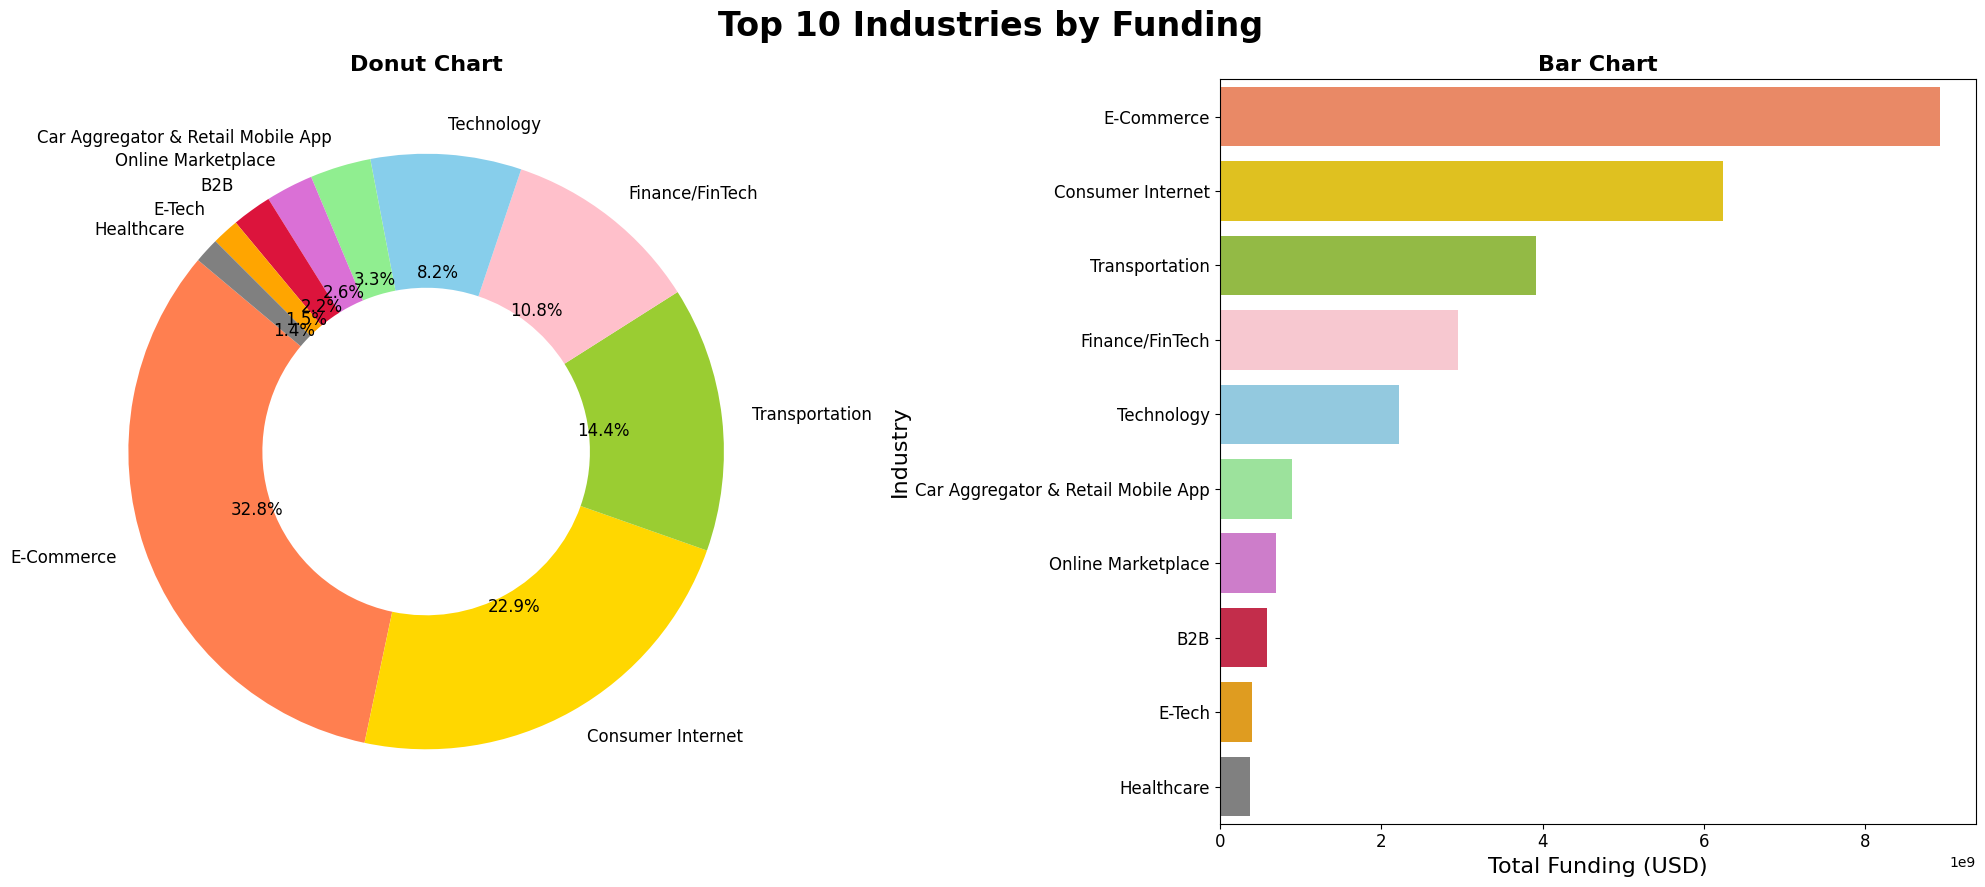

In [39]:
import matplotlib.pyplot as plt
fig, axes =plt.subplots(1,2, figsize=(20,9))

#bar chart
sns.barplot(ax=axes[1],data=top_sector, x='Amount in USD', y='Industry Vertical', width=0.8,
            palette=["coral","gold","yellowgreen", "Pink", "skyblue", "lightgreen", "Orchid", "crimson", "orange", "grey"])
axes[1].set_title("Bar Chart", fontsize=16, fontweight='bold')
plt.xlabel("Total Funding (USD)", fontsize=16)
plt.ylabel("Industry", fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

#donut chart
axes[0].pie(top_sector["Amount in USD"], labels=top_sector["Industry Vertical"], autopct='%1.1f%%', startangle=140, textprops={'fontsize':12},
            colors=["coral","gold","yellowgreen", "Pink", "skyblue", "lightgreen", "Orchid", "crimson", "orange", "grey"],
            wedgeprops=dict(width=0.45))
axes[0].set_title("Donut Chart", fontsize=16, fontweight='bold')

fig.suptitle("Top 10 Industries by Funding", fontsize=24, fontweight='bold')

plt.tight_layout()
plt.savefig("subplots.png", dpi=300, bbox_inches='tight')
plt.show()

### *💡The bar chart shows exact amount of funding (in USD) received by each industry while the donut chart helps visualize their share proportionally.*
### *Insights: E-Commerce and Consumer Internet stand out with the highest funding, clearly dominating the landscape. Other significant sectors include Transportation, EdTech, FinTech and Technology which have also received notable investments. Investors seem to be betting heavily on industries that impact the daily lives of consumers at scale.*

###

# 🔎Who are the most active investors fueling Indian startups?

In [40]:
df['Investors Name'].unique()

array(['Accel Partners, SAIF Partners',
       'Rudy Gopalakrishnan, ah! Ventures',
       'Rajesh Sawheny , Rajan Anandan, Amit Ranjan, Niraj Singh, AECAL, MeraEvents.',
       ...,
       'Shunwei Capital, Tuscan Ventures, Ashish Goenka, VC firms India Quotient and Kae Capital',
       'Bessemer Ventures, Kae Capital',
       'Rajendra Gogri,\\\\xc2\\\\xa0 Chandrakant Gogri'],
      shape=(1514,), dtype=object)

In [41]:
from wordcloud import WordCloud
investors=' '.join(df['Investors Name'].dropna().astype(str)) #joining all investors name in a single string

In [42]:
#creating wordcloud object
wordcloud=WordCloud(width=800, height=400, background_color='white', colormap='rocket').generate(investors)

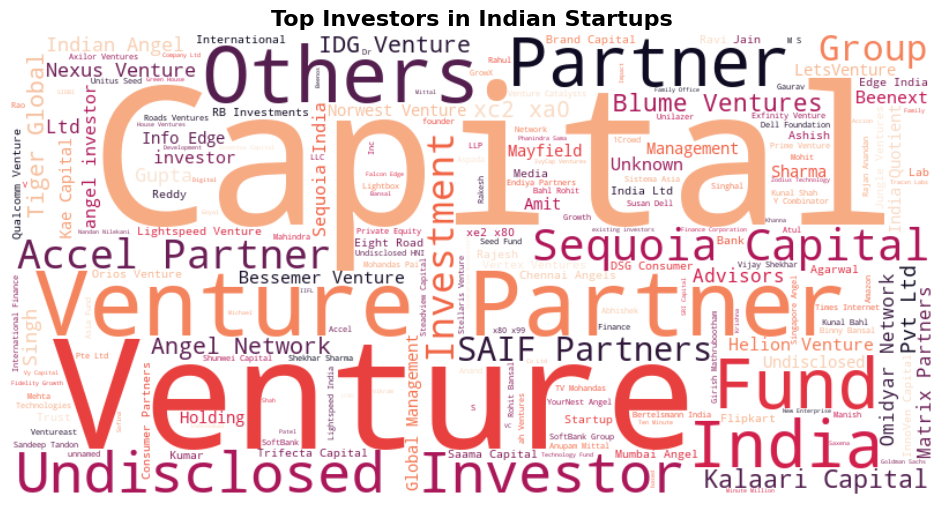

In [43]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Investors in Indian Startups", fontsize=16, fontweight='bold')
plt.savefig("wdcloud.png", dpi=300, bbox_inches='tight')
plt.show()

### *💡The WordCloud highlights the top investors based on frequency of investments.*
### *Insights: Names like Venture, Capital and Venture Partner appear more prominantly showing that venture capital firms dominate the investment landscape. These are some of the most active investors in Indian Startups. Specific names like Sequoia Capital, Accel Partner, Saif Partner, Kalaari Capital, Blume Ventures, IDG Venture also indicate their frequent involvement in investment.*

### Dataset Source (Kaggle): https://www.kaggle.com/datasets/venkateswarlukuruva/indian-startup-funding-2023